In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("architecture_projects_cleaned.csv")
print(df.head())

  project_type  project_duration  budget_million  num_floors  \
0  Residential                25        4.932364          17   
1  Residential                10        5.650000           1   
2   Commercial                25        6.100000           6   
3   Commercial                22        6.440000           9   
4   Commercial                29        4.600000          10   

   client_satisfaction  
0                  1.6  
1                  8.6  
2                  3.3  
3                  4.5  
4                  6.9  


In [24]:
df.loc[np.random.choice(df.index, 10), 'budget_million'] = np.nan
df.loc[np.random.choice(df.index, 5), 'client_satisfaction'] = np.nan
df.to_csv('architecture_projects_miss.csv', index=False)

In [25]:
df = pd.read_csv('architecture_projects_miss.csv')
print("Data Shape with Missing:", df.shape)
df['budget_million'] = df['budget_million'].fillna(df['budget_million'].mean())
df = df.dropna(subset=['client_satisfaction'])
print("Cleaned Data Shape:", df.shape)
df.to_csv('architecture_projects_cleaned.csv', index=False)

Data Shape with Missing: (115, 5)
Cleaned Data Shape: (110, 5)


In [26]:
#NumPy Operations
budget = df['budget_million'].to_numpy()
duration = df['project_duration'].to_numpy()
floors = df['num_floors'].to_numpy()
print("\nNumPy Operations:")
print(f"Average Budget: {np.mean(budget):.2f} million")
print(f"Standard Deviation of Duration: {np.std(duration):.2f} months")
print(f"Maximum Floors: {np.max(floors)}")
print(f"Minimum Client Satisfaction: {np.min(df['client_satisfaction'])}")
print(f"Sum of All Floors: {np.sum(floors)}")


NumPy Operations:
Average Budget: 4.86 million
Standard Deviation of Duration: 8.12 months
Maximum Floors: 19
Minimum Client Satisfaction: 1.1
Sum of All Floors: 1057


In [27]:
#Correlation
correlation = np.corrcoef(budget, duration)[0, 1]
print(f"\nCorrelation between Budget and Duration: {correlation:.2f}")


Correlation between Budget and Duration: -0.11


In [28]:
#SciPy t-test: compare satisfaction between Residential and Commercial projects
res_satisfaction = df[df['project_type'] == 'Residential']['client_satisfaction']
com_satisfaction = df[df['project_type'] == 'Commercial']['client_satisfaction']
t_stat, p_val = stats.ttest_ind(res_satisfaction, com_satisfaction)
print(f"T-test between Residential and Commercial satisfaction: t={t_stat:.2f}, p={p_val:.4f}")

T-test between Residential and Commercial satisfaction: t=0.93, p=0.3591


In [29]:
#Statsmodels Linear Regression: predict duration from budget
X = sm.add_constant(df['budget_million'])
model = sm.OLS(df['project_duration'], X).fit()
print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:       project_duration   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.232
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.269
Time:                        00:03:12   Log-Likelihood:                -385.84
No. Observations:                 110   AIC:                             775.7
Df Residuals:                     108   BIC:                             781.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

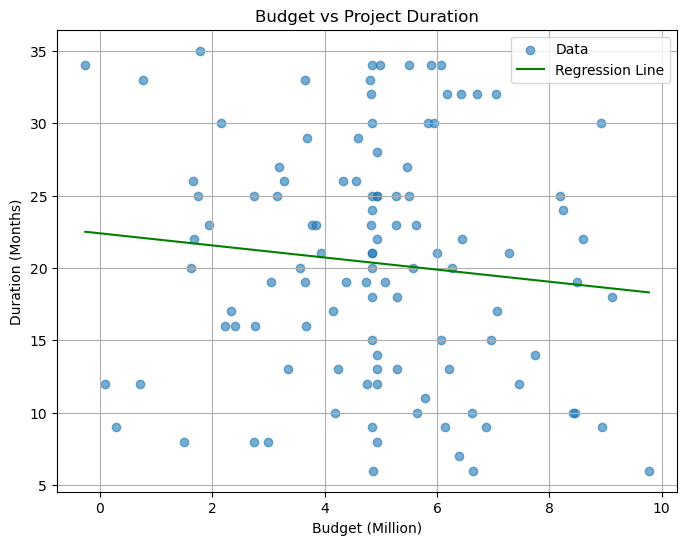

In [30]:
#Regression Line Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['budget_million'], df['project_duration'], alpha=0.6, label='Data')
x_vals = np.linspace(df['budget_million'].min(), df['budget_million'].max(), 100)
y_pred = model.params.iloc[0] + model.params.iloc[1] * x_vals
plt.plot(x_vals, y_pred, color='green', label='Regression Line')
plt.title('Budget vs Project Duration')
plt.xlabel('Budget (Million)')
plt.ylabel('Duration (Months)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#Boxplot: Client Satisfaction by Project Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='project_type', y='client_satisfaction', data=df)
plt.title('Client Satisfaction by Project Type')
plt.savefig('client_satisfaction_boxplot.png')
plt.close()

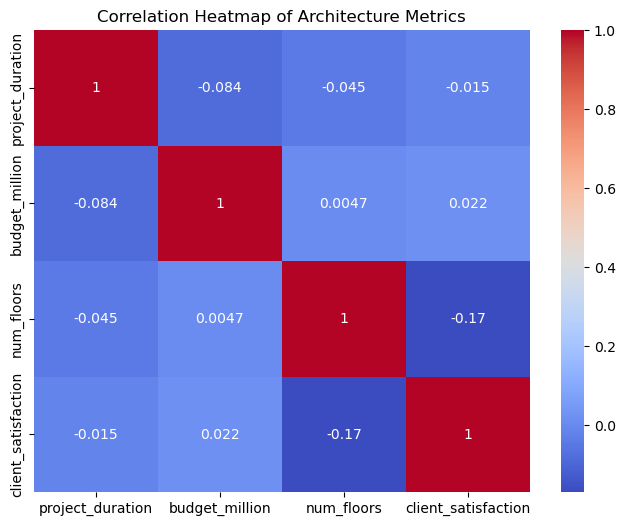

In [21]:
#Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Architecture Metrics')
plt.savefig('architecture_correlation_heatmap.png')
plt.show()